# Data Visualizations

<a id="0"></a>
Table of contents
- [Bar Charts](#1)
  - [Bar charts by seaborn](#2)
  - [Bar charts by matplotlib](#3)
- [Absolute and Relative frequency](#4)
  - [xticks and yticks functions](#5)
  - [Additional variations](#6)
- [Counting Missing Values](#7)
- [Pie Charts](#8)
  - [Donut Plots](#9)
- [Histogram](#10)  

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id = "1"></a>
## Bar Charts 
[table of contents](#0)

If you are interested in the distribution of a qualitative variable, your primary visualization of choice will probably be the bar chart. For nominal data, you might want to arrange the bars in order of frequency with the most common on the left. This makes it easy to see which category is the most common and how the rest of the categories compare. You should not inclided to do this with ordinal data. The inherent order of the levels will usually be a more important feature to convey. It is more important to know if the most common categories are lower or higher in the spectrum rather than just which label is the most frequent. One common variation that you might see for bar chart is the horizontal bar chart if you have a lot of categories or the category names are long.

In [7]:
# load the dataset
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


<a id="2"></a>
### Bar Chart by Seaborn
[table of contents](#0)

Syntax:
```
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

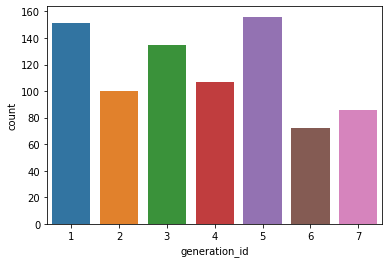

In [5]:
# make a default bar chart by generation_id
sb.countplot(data=pokemon, x='generation_id');

The default color setting is distracting and not necessary. We don't have a good reason right now to associate each generation with a different color. It's better to start by plotting everything in one color to avoid being distracted. We would like to pick a different color palette.

sb.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)

Return: a list of RGB tuples or
class:`matplotlib.colors.Colormap`


In [3]:
# use seaborn color_palette function to get current default palette (since no parameters are specified)
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
# pick a blue color palette
base_color = sb.color_palette()[0]

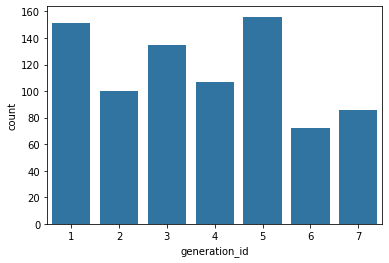

In [11]:
# set the base color, now much cleaner
sb.countplot(data=pokemon, x='generation_id', color=base_color);

Sort the number of pokemon species done by order parameter

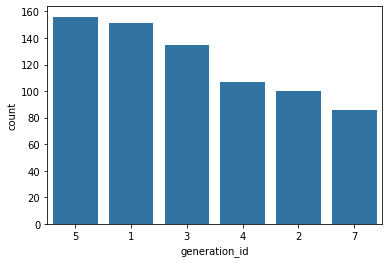

In [12]:
# hard-coded version
sb.countplot(data=pokemon, x='generation_id', color=base_color, 
             order=[5, 1, 3, 4, 2, 7]);

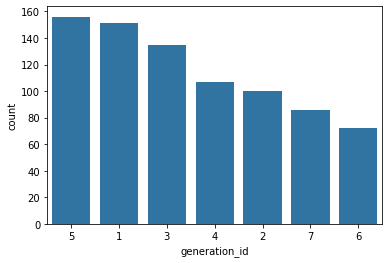

In [13]:
# programmatic version (better approach)
# value_counts() counts the frequency of each unique value in the Series and 
# sort them in descending order
gen_order = pokemon.generation_id.value_counts().index  # get the index 
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

Let's look at another categorical variable.

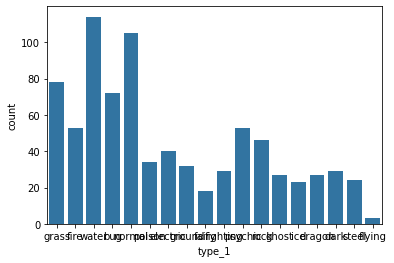

In [14]:
# make a default bar chart by type_1
# overlapping x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);

 To get around of it, we can ...

In [ ]:
# 1. rotate the x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

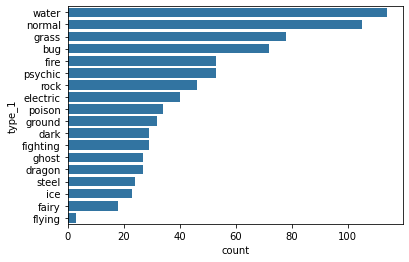

In [20]:
# 2. create a horizontal bar chart
# in seaborn, this is as simple as changing the x parameter into a y
type_order = pokemon.type_1.value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);
# plt.axis('auto');

While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. For ordinal-type data, we probably want to sort the bars in order of the variables. The best thing for us to do in this case is to convert the column into an ordered categorical data type.

> Additional Variation - Refer to the [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html) to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an `"order"` parameter each time it's required in a plot.

Should you find that you need to sort an ordered categorical type in a different order, you can always temporarily override the data type by setting the "order" parameter as above.

<a id="3"></a>
### Bar Chart by Matplotlib
[table of contents](#0)

You can even create a similar bar chart using the Matplotlib, instead of Seaborn. We will use the [`matplotlib.pyplot.bar()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)  function to plot the chart. The syntax is:

> matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

Refer to the documentation for the details of optional arguments. In the example below, we will use `Series.value_counts()`  to extract a Series from the given DataFrame object.

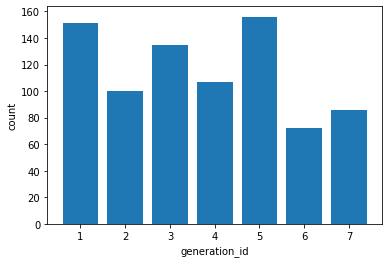

In [25]:
# return the Series having unique values
x = pokemon.generation_id.unique()

# return the Series having frequency count of each unique value
y = pokemon.generation_id.value_counts(sort=False)  # we don't want the counts to be sorted

# plot
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

<a id="4"> </a>
### Absolute vs Relative Frequency
[table of contents](#0)

Performed some data wrangling to obtain a data frome with both first and second types in a single column "type". 

In [8]:
# take part of and reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')

In [9]:
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


I also created some variables to get the types in order of frequency. 

In [10]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# by default, returns the decreasing order of the frequency
type_counts = pkmn_types.type.value_counts()

# Get the unique values of the `type` column, 
# in the decreasing order of the frequency.
type_order = type_counts.index

In [80]:
# show the type counts
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [51]:
type_counts.shape

(18,)

In [81]:
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

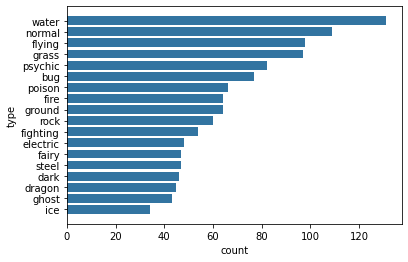

In [19]:
# make a horizontal bar chart with absolute counts
# fig, ax = plt.subplots(figsize=(8, 10))
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.axis('tight');

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

One way of doing this is to use Matplotlib to change the tick marks from labeling absolute counts to relative counts.

In [14]:
# get the total number of pokemons
n_pokemon = pokemon.shape[0]

# return the highest frequency in the `type` column
max_type_count = type_counts[0]

# return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [15]:
# Use numpy.arange() function to produce a set of evenly spaced 
# proportioned values between 0 and max_prop, with a step size 2%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

I am also using a list comprehension to create an additional variable, tick_names, to apply to the tick labels. These string will show the proportions with a consistent two decimal places.

In [16]:
# create a list of String values that can be used as tick labels.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

To change the tick locations and labels, we use Matplotlib xticks function.

<a id="5"></a>
#### The Matplotlib's xticks and yticks functions

The first argument takes the tick locations: in this case, since the counts are still an absolute value. we need to multiply `tick_props` by the number of Pokemon to get their position correct. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places. 

We need to use both arguments here since the positions and their values are different. And we use the xlabel function to change the x-axis label from the defaul "count" to more appropriate "proportion".

[table of contents](#0)

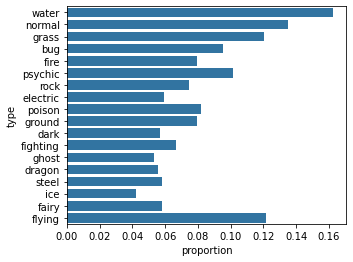

In [25]:
# make the charts with new x-tick labels
fig, ax = plt.subplots(figsize=(5, 4))
sb.countplot(data=pkmn_types, y='type', color=base_color, 
             order=type_order, ax=ax);

# Change the tick locations and labels
plt.xticks(ticks=tick_props * n_pokemon, labels=tick_names)
plt.xlabel('proportion');
# plt.axis('auto');

<a id="6"></a>
#### Additional Variations
[table of contents](#0)

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This is where the flexibility of Matplotlib can shine. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

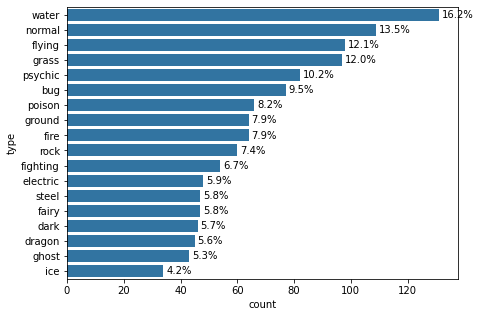

In [29]:
# print the text (proportion) on the bars of a horizontal plot

base_color = sb.color_palette()[0]
type_order = pkmn_types.type.value_counts().index

fig, ax = plt.subplots(figsize=(7, 5))

sb.countplot(data=pkmn_types, y='type', color=base_color, 
             order=type_order, ax=ax);



# Logic to print the proportion text on the bars
n_pokemon = pokemon.shape[0]
for i in range (type_counts.shape[0]):
    
    # Remember the type_counts contains the frequency of 
    # unique values in the type column in decreasing order
    count = type_counts[i]
    
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # Print the string value on the bar
    plt.text(count+1, i, pct_string, va='center') #va: vertical alignment
    
# change the figure size in inches
# plt.rcParams['figure.figsize'] = 10, 12
# plt.axis('auto')

Actually, there are two ways to plot this.

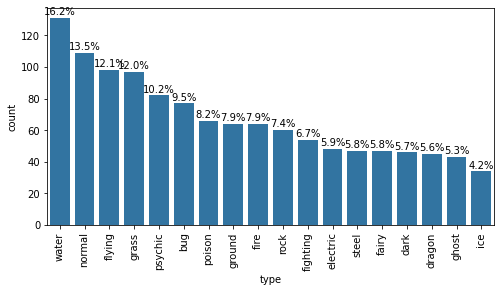

In [33]:
# Print the text (proportion) below the bars of a Vertical plot
fig, ax = plt.subplots(figsize=(8,4))

sb.countplot(data=pkmn_types, x='type', color=base_color, 
             order=type_order, ax=ax);

# Recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')

# Specify the figure size in inches, for both X, and Y axes
# plt.rcParams['figure.figsize'] = 12, 8


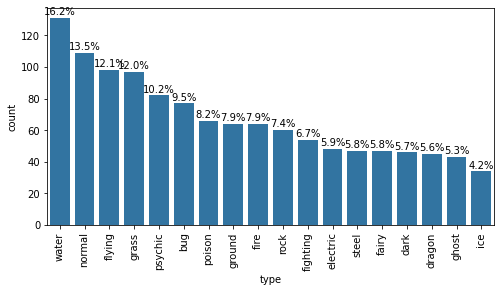

In [36]:
# Print the text (proportion) below the bars of a Vertical plot
fig, ax = plt.subplots(figsize=(8,4))

sb.countplot(data=pkmn_types, x='type', color=base_color, 
             order=type_order, ax=ax);
plt.xticks(rotation=90) 

# Recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

for i in range(type_counts.shape[0]):

    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)    
    
    plt.text(i, count+2, pct_string, ha='center', color='black')
                                   # ha: horizontal alignment

# Specify the figure size in inches, for both X, and Y axes
# plt.rcParams['figure.figsize'] = 12, 8

<a id="7"></a>
## Counting Missing values
[table of contents](#0)

If you have a large dataframe, and it contains a few missing values (None or a numpy.NaN), then you can find the count of such missing value across the given label. For this purpose, you can use either of the following two analogous functions :

1. `pandas.DataFrame.isna()`
2. `pandas.DataFrame.isnull()`

The functions above are alias of each other and detect missing values by returning the same sized object as that of the calling dataframe, made up of boolean True/False.

In [37]:
# load the dataset
sales_data = pd.read_csv("sales-data.csv")
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
# take a look the summary of the missing values 
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [38]:
# chop some columns out
na_counts = sales_data.drop(columns=['Date', 'Temperature', 'Fuel_Price']).isna().sum()

In [39]:
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
na_counts.index

Index(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [19]:
na_counts.values

array([   0, 4158, 5269, 4577, 4726, 4140,  585,  585,    0], dtype=int64)

Make a bar plot.

`plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None,
    **kwargs,)`

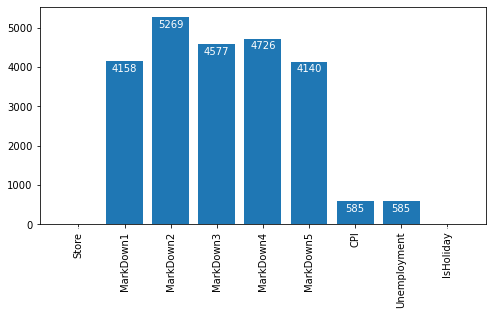

In [42]:
# using plt.bar()
fig, ax = plt.subplots(figsize=(8 ,4))
plt.bar(na_counts.index, na_counts) 
plt.xticks(rotation=90);

# add the count at the top of the bar
for i, count in enumerate(na_counts):    
    count_str = '{:d}'.format(count)
    plt.text(i, count-60, count_str, ha='center', va='top', color='white')

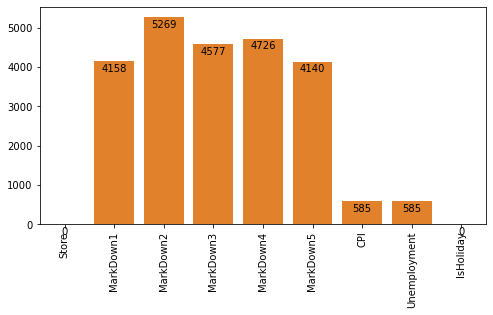

In [46]:
# using seaborn barplot
fig, ax = plt.subplots(figsize=(8, 4))

sb.barplot(x=na_counts.index, y=na_counts, ax=ax, 
           color=sb.color_palette()[1])

# add the count at the top the of the bar
locs, labels = plt.xticks(rotation=90)
for loc, label in zip(locs, labels):
    count = na_counts[label.get_text()]
    count_str = '{:d}'.format(count)
    plt.text(loc, count-60, count_str, ha='center', va='top')  


<a id="8"></a>
## Pie Charts and Donut Plots
[Table of contents](#0)

A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is less, and you'd like to see the proportion of each category on a chart. 

Most of time, you will probably prefer a bar chart over either on these two plots. It is actually fairly difficult to get an accurate estimate of relative frequency from a pie or donut plot alone. If there are a log of categories, there are major limitations on how many categories can be plotted in a readable way. A bar chart will usually be more versatile and should be your first choice for exploring qualitative variables. 

When to use pie or donut charts then: 
- Showning how the data is broken down into parts
- Plotting a small number of slices (two or three so the relative portions are distinct)

Usually, you should start planning from the 12 o'clock position and then mark slices clockwise in order of frequency.

In [48]:
sorted_counts = pokemon.generation_id.value_counts()
sorted_counts

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. 

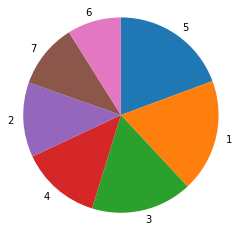

In [33]:
plt.pie(sorted_counts, labels=sorted_counts.index, 
        startangle=90, counterclock=False)
plt.axis('square');

The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.

Did you notice the various arguments in the `plt.pie()` function? Particularly, the `labels=sorted_counts.index` argument represents a list of strings serving as labels for each wedge. Notice that the labels are arranged in the decreasing order of the frequency.

<a id="9"></a>
### Donut Plots
[Table of contents](#0)

A sister plot to the pie chart is the **donut plot**. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a `wedgeprops` argument to the `pie` function call. By default, the radius of the pie (circle) is 1; setting the wedges' `width` property to less than 1 removes coloring from the center of the circle.

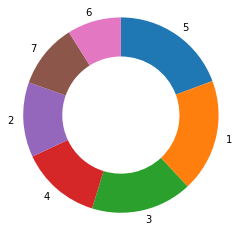

In [49]:
# create a donut plot using wedgeprops
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

Refer to the documentation: [Wedge patches](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Wedge.html)

<a id="10"></a>
## Histogram
[Table of contents](#0)

If you have a quantitative variable, then your univariate plot of choice will probably be the histogram. Similar to a bar chart you have feature values on the x-axis and counts on the y-axis. However, due to the numeric nature of the data, bars in a histogram do not indicate counts on single values, but instead on value ranges called bins. Normally bins include values on their left end and exclude values on their right end. So the data point with the value at the edge of a bin will go into the bin on its right.  

The size of the bins can have a major effect on how you interpret the data. If your bin size is too large, you may end up losing a lot of information about the overall distribution of data. And a too small bin size can introduce noise that can distract from the main trends in your data. 

When creating a histogram, it's a good idea to play around with different settings for the bin sizes and boundary points to achieve a good understanding of the plotted variable.

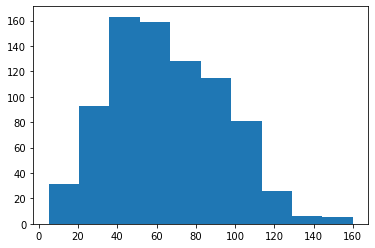

In [50]:
# create a histogram using plt.hist()
# y-axis indicates counts on the bin range
plt.hist(data=pokemon, x='speed');

There isn't a lot of details here. By default the bin size is 10, usually is too few. In addition, the bin boundaries are not particularly aligned with tick marks making interpretation trickier. To solve this, we want to use the "bins" parameter of the `hist` function. 

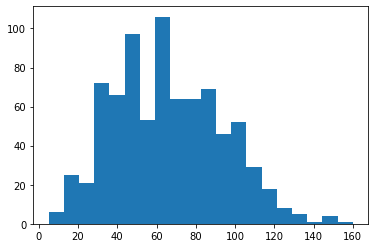

In [42]:
# specify bin size by a constant
plt.hist(data=pokemon, x='speed', bins=20);

We have more detailed look at the data, but this still have the problem of awkward bin boundaries. You can see the bin edges and counts return by hist when the semicolon is removed. The fact that bin edges are non-integer and the data values are integer will mean that some bins cover more integer values than others. Instead, the better way of using the "bins" parameter is to specify the bin boundaries explicitly. 

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

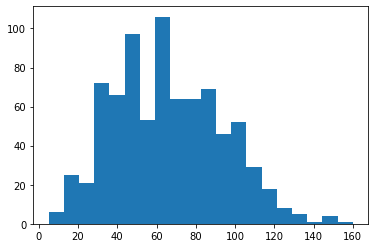

In [51]:
plt.hist(data=pokemon, x='speed', bins=20)

Here I will make use Numpy's `arange` function to create bins of size 5. The first argument is the minimum value, while the second argument will be the maximum value. The third argument gives the step size for the bins. I will add plus 5 to the second argument. This is because the values generated by `arange` will not include the maximum value. By adding 5, this means that all values should be represented in the chart. When I add bins to the "bins" parameter, this creates a view of the data that implies the data is approximately uni-model, save for a bit of a dip in the 75-85 range. 

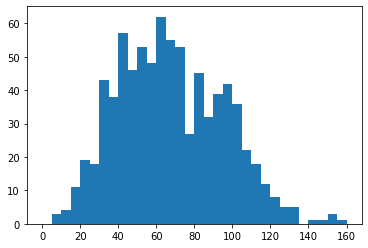

In [43]:
# specify bin boundaries explicitly
# use numpy arange() to create bins of step-size 5 
bins = np.arange(0, pokemon.speed.max()+5, 5)  # it does not include max value, thus max()+5
plt.hist(data=pokemon, x='speed', bins=bins);

What is we try a very small bin size, like 1. On the one hand, this bin size is perhaps a bit too small, introducing a lot of noise in the plot. On the other hand, this does a good job of showing that Pokemon's speed statistics are usually divisible by 5.

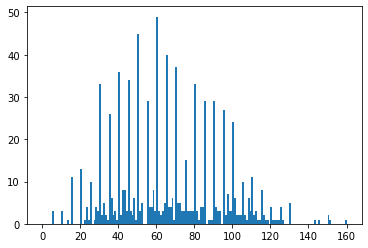

In [51]:
# specify extremely small bin size
# use numpy arange() to create bins of size 1 
bins = np.arange(0, pokemon.speed.max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

### Use seaborn for histograms

- Create a histgram using seaborn `displot`, or `histplot`.
- It only takes a mandatory Series argument
- The default bin size is larger than 10 in matplotlib

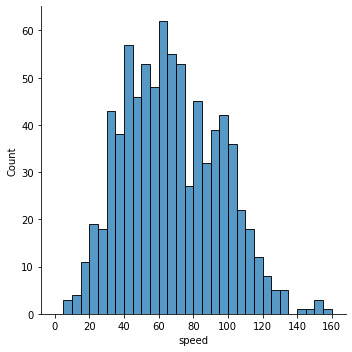

In [68]:
# use seaborn displot()
# histogram is the default kind in displot function
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.displot(pokemon.speed, bins=bin_edges); 

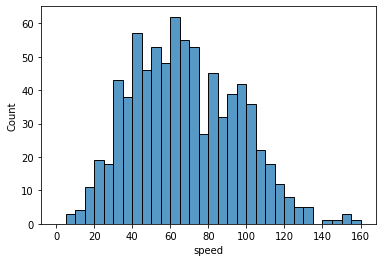

In [70]:
# use seaborn histplot()
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.histplot(pokemon.speed, bins=bin_edges);

### Plot two histograms side-by-side

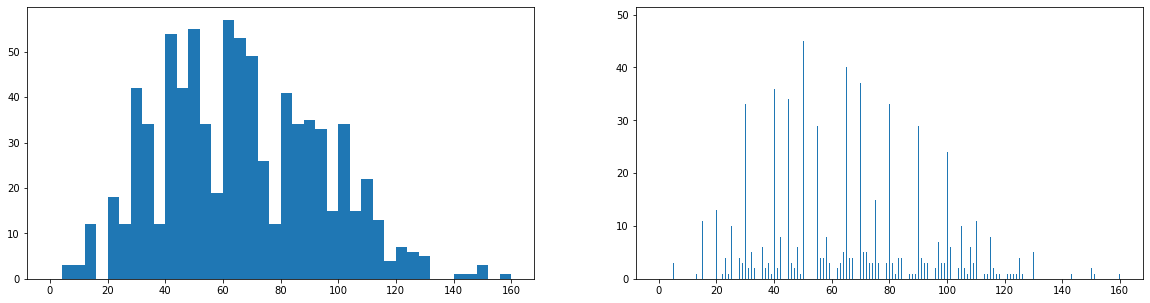

In [72]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

### Figure and Axes 
At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's subplot() function. If you have any questions about how that or the figure() function worked, then read on. This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of visualization in matplotlib is a [`Figure`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) object. Contained within each `Figure` will be one or more [`Axes`](https://matplotlib.org/stable/api/axes_api.html) objects, each `Axes` object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. For example:
> `plt.hist(data=pokemon, x='speed');`

Since we don't have a `Figure` area to plot inside, Python first creates a `Figure` object. And since the Figure doesn't start with any `Axes` to draw the histogram onto, an `Axes` object is created inside the Figure. Finally, the histogram is drawn within that `Axes`.

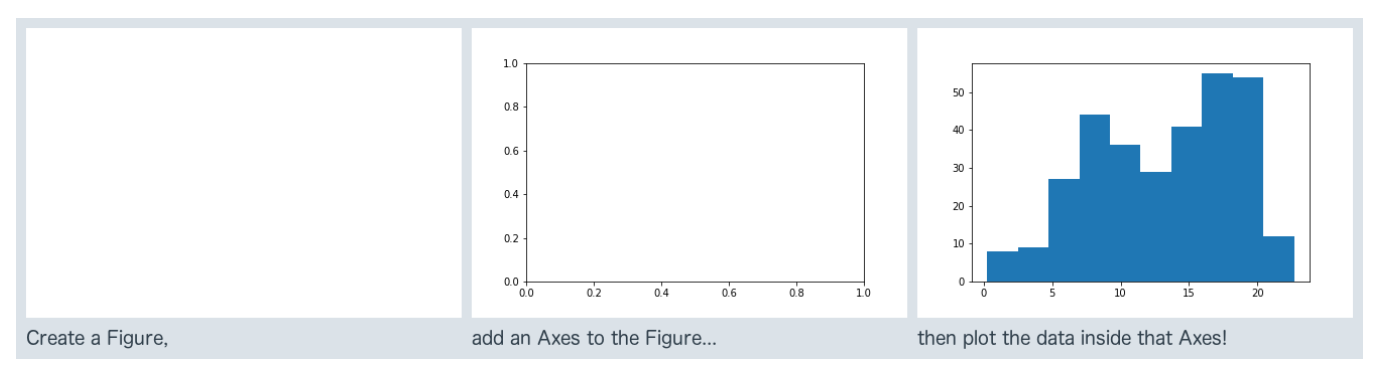 [from Udacity]

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. We could have created the histogram is to explicitly set up the `Figure` and `Axes` like this:

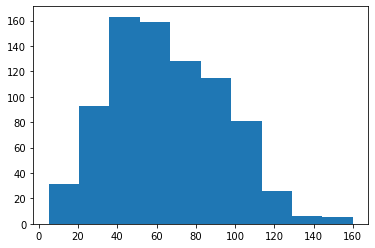

In [73]:
# Create a new figure
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

`figure()` creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is `.add_axes()`, which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes.

The argument of `add_axes` represents the dimensions [left, bottom, width, height] of the new axes. The first two elements of the list indicate the position of the lower-left hand corner of the `Axes`, in this case one quarter of the way from the lower-left corner of the `Figure` and the last two elements specifying the `Axes` width and height respectively. All quantities are in fractions of `figure` width and height.


To use `Axes` objects with `seaborn`, `seaborn` functions usually have an "ax" parameter to specify upon which `Axes` a plot will be drawn.

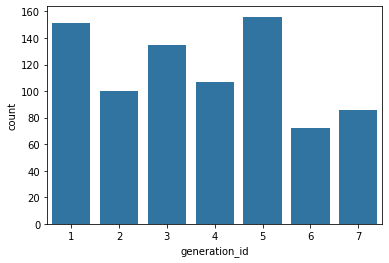

In [75]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color, 
             ax=ax);

`plt.subplot(1, 2, 1)` creates a new `Axes` in our `Figure`, its size determined by the `subplot()` function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new `Axes` in the first slot. Then, `plt.subplot(1, 2, 2)` creates a new Axes in the second subplot slot, and sets that one as the current `Axes`.

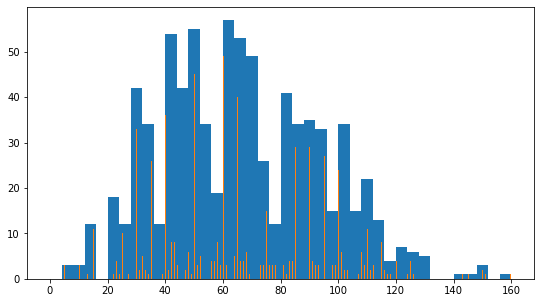

In [77]:
# remove the the second subplot setting
# the plots are now overlapping
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# histogram on right, example of too-small bin size
# plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

### Demonstrate `plt.sca()` and `plt.text()`

If you don't assign Axes objects as they're created, you can retrieve the current Axes using [`ax=plt.gca()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html) (get current axis), or you can get a list of all Axes in a Figure fig by using [`axes=fig.get_axes()`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html). As for creating subplots, you can use [`fig.add_subplot()`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function

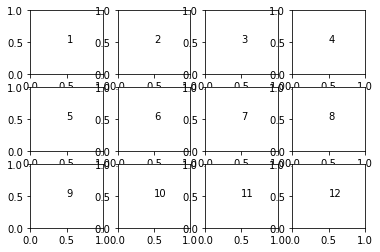

In [83]:
# grid of 3x4 subplots
fig, axes = plt.subplots(3, 4)

# print('3 x 4 array:', axes)
axes = axes.flatten() # reshape from the 3x4 array into a 12-element vector
# print('Now is a vector:', axes)

for i in range(12):
    plt.sca(axes[i]) # sca: set current axis
    plt.text(0.5, 0.5, i+1) 
         # print conventional subplot index number to 
         # the middle of Axes
    